진행 중 사용 가능한 외부 라이브러리

1. nltk (필수)
2. collections
3. requests
4. bs4
5. pandas (필수)
6. re
7. operator

명사 카테고리 들을 분류 해야함.

명사 카테고리는
1. NN
2. NNS
3. NNP
4. NNPS


사용 많이 하는 단어들

nltk word_tokenize (개별로 떨어뜨리는 명령어) pos_tag(단어의 종류를 분류)

문장 - 명사 네트워크 -> 명사-명사 네트워크

알파벳 네트워크 만들기 -> 알파벳 - 알파벳 네트워크

fruits = ['apple', 'banana', ...]



- 필요한 라이브러리 정의 및 설치


In [ ]:
import nltk
import requests
from bs4 import BeautifulSoup
import re # 텍스트 편집할 때 사용 (필요 없는 것들 삭제)
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

- imdb에서 텍스트 불러온 후 문장은 sentence에 단어 및 형태소는 text_list에 정리 

In [ ]:
G = nx.Graph()

sentence = []
text_list = []

site = ["https://www.imdb.com/title/tt0371746/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt0848228/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt0800080/plotsummary?ref_=tt_stry_pl#synopsis"
, "https://www.imdb.com/title/tt1228705/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt0800369/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt0458339/plotsummary?ref_=tt_stry_pl#synopsis"
, "https://www.imdb.com/title/tt1300854/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt1981115/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt1843866/plotsummary?ref_=tt_stry_pl#synopsis"
, "https://www.imdb.com/title/tt2015381/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt2395427/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt0478970/plotsummary?ref_=tt_stry_pl#synopsis"
, "https://www.imdb.com/title/tt3498820/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt1211837/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt3896198/plotsummary?ref_=tt_stry_pl#synopsis"
, "https://www.imdb.com/title/tt2250912/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt3501632/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt1825683/plotsummary?ref_=tt_stry_pl#synopsis"
, "https://www.imdb.com/title/tt4154756/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt5095030/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt4154664/plotsummary?ref_=tt_stry_pl#synopsis"
, "https://www.imdb.com/title/tt5095030/plotsummary?ref_=tt_stry_pl#synopsis", "https://www.imdb.com/title/tt6320628/plotsummary?ref_=tt_stry_pl#synopsis"]

for x in site:
  r = requexsts.get(x)
  c = r.content
  movies = BeautifulSoup(c, "html.parser")
  movies = movies.find("ul", {"id" : "plot-synopsis-content"} , {"class" : "ipl-zebra-list"})
  movies = str(movies)
  movies = re.sub('<.+?>', '', movies, 0, re.I|re.S)
  movies = movies.replace("Iron Man", "Ironman")
  movies = movies.replace("New York", "NewYork")
  movies = movies.replace("Captain America", "CaptainAmerica")
  movies = movies.replace("Black Panther", "BlackPanther")
  movies = movies.replace("Winter Soldier", "WinterSoldier")
  movies = movies.replace("Infinity Stone", "InfinityStone")
  movies = movies.replace("Stone", "InfinityStone")
  movies = movies.replace("Red Skull", "RedSkull")
  movies = movies.replace("Ancient One", "AncientOne")

  sent = nltk.sent_tokenize(movies)
  sentence = sentence + sent
  text = nltk.word_tokenize(movies)
  text_list = text_list + nltk.pos_tag(text)

text_list = list(set(text_list))

del sentence[0]
del text_list[0]




- 단어 중 명사만 NOUN에 저장.
- 그리고 문장 - 명사 matrix를 만들어서 adjacency matrix를 만들고, 그 중 10 이상의 값을 가지는 원소만 표현 

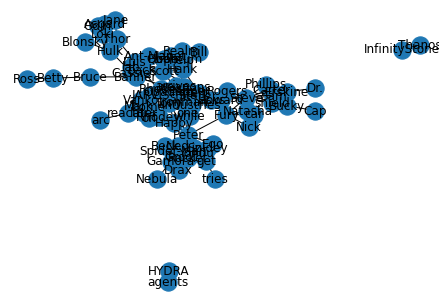

In [ ]:
NOUN = [word for word, pos in text_list if pos in ['NN','NNS', 'NNP', 'NNPS']]

NOUN = list(set(NOUN))

matrix = np.zeros([len(sentence), len(NOUN)])

for i in range(len(sentence)):
  senten = nltk.word_tokenize(sentence[i])
  for j in range(len(NOUN)):
    if NOUN[j] in senten:
      matrix[i][j] = 1

adjacency = matrix.T.dot(matrix)

for i in range(len(NOUN)-1):
  for j in range(i+1, len(NOUN)):
    if adjacency[i][j] > 10:
      G.add_edge(NOUN[i], NOUN[j])


nx.draw(G, with_labels = 1)
plt.show()

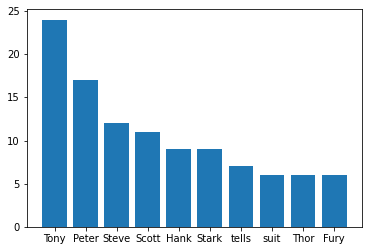

In [ ]:
Degree = nx.degree(G)

Degree_dict = dict(Degree)
Sort_Degree = sorted(Degree_dict.items(), key=lambda x: x[1], reverse = True)
Sort_Degree_head = Sort_Degree[:10]
Degree_x = []
Degree_y = []
for i in range(len(Sort_Degree_head)):
  Degree_x.append(Sort_Degree_head[i][0])
  Degree_y.append(Sort_Degree_head[i][1])

plt.bar(Degree_x, Degree_y)
plt.show()

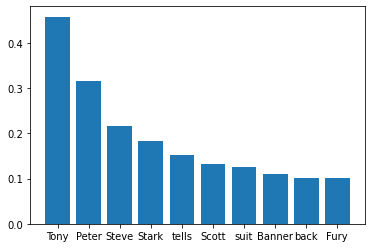

In [ ]:
BC = nx.betweenness_centrality(G)

BC_dict = dict(BC)
Sort_BC = sorted(BC_dict.items(), key=lambda x: x[1], reverse = True)
Sort_BC_head = Sort_BC[:10]
BC_x = []
BC_y = []
for i in range(len(Sort_BC_head)):
  BC_x.append(Sort_BC_head[i][0])
  BC_y.append(Sort_BC_head[i][1])

plt.bar(BC_x, BC_y)
plt.show()